In [1]:
import cv2
import mediapipe as mp
import numpy as np
from IPython.display import Image
mp_drawings = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

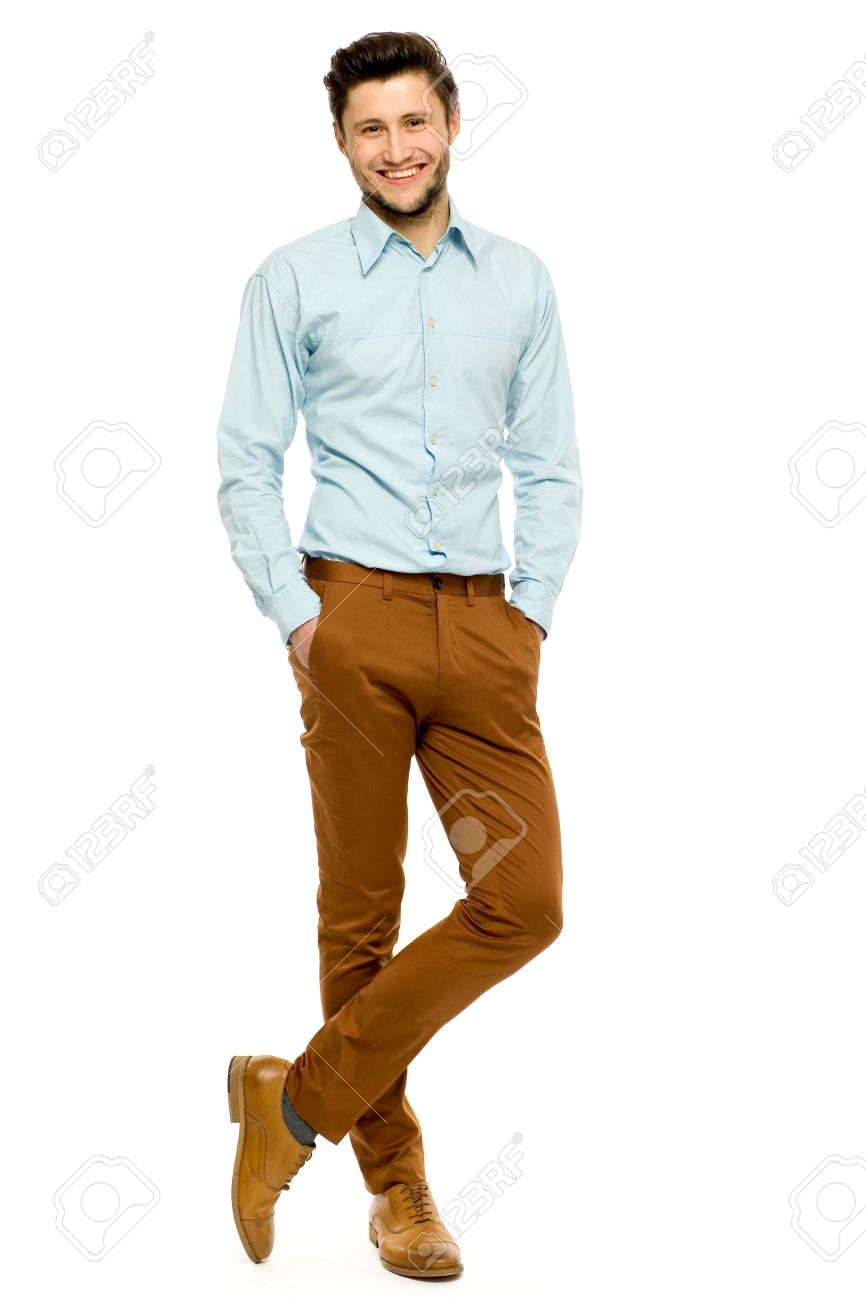

In [2]:
image_path = r'C:\Users\birud\OneDrive - iitgn.ac.in\github\Pose-estimation\files\test images\body.jpg'
display(Image(filename=image_path, width=300, height=300))

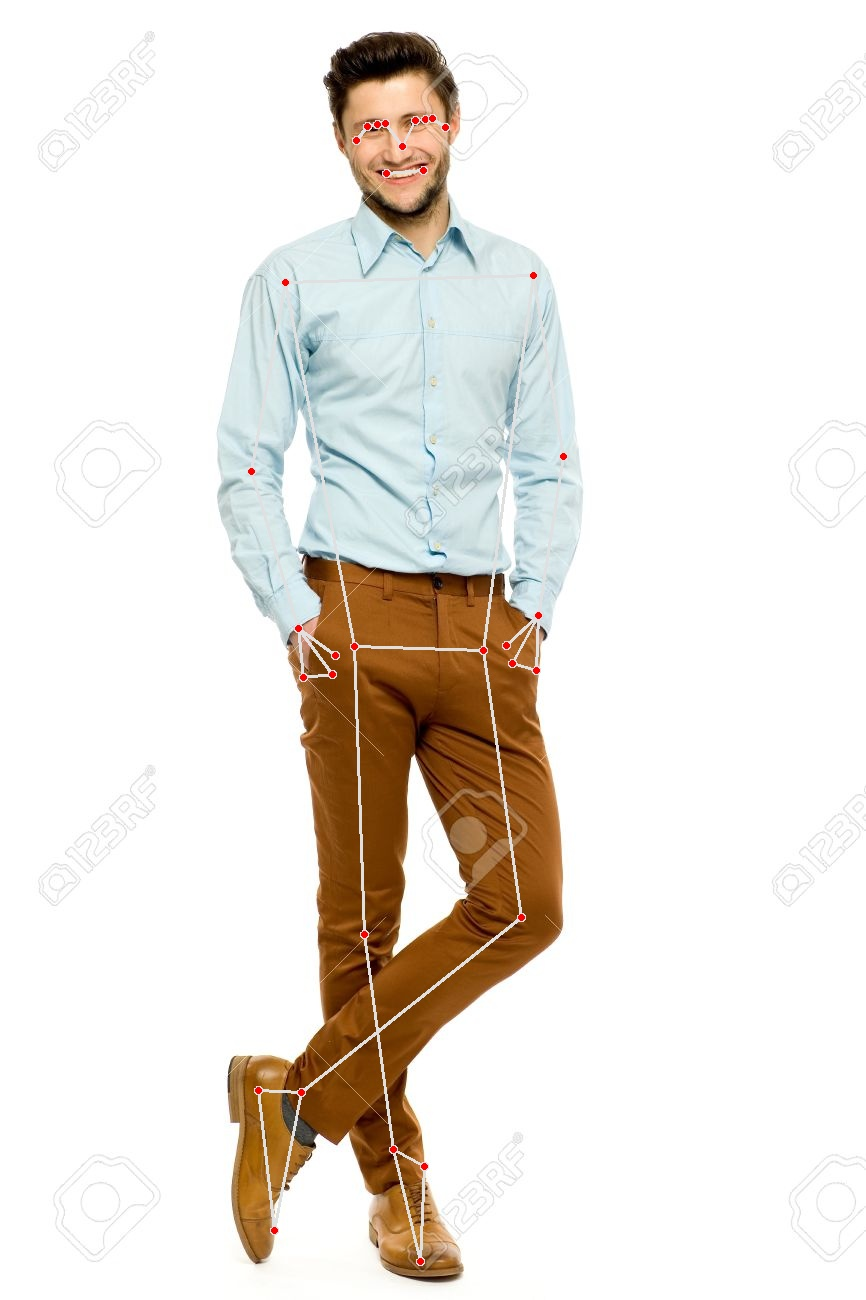

In [3]:
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    img = cv2.imread(r"C:\Users\birud\OneDrive - iitgn.ac.in\github\Pose-estimation\files\test images\body.jpg", cv2.IMREAD_COLOR)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = pose.process(image)
    
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        mp_drawings.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS) 

    # Display the image (for Jupyter notebook or similar environments)
    display(Image(data=cv2.imencode('.jpg', image)[1].tobytes(), width=500, height=500))

In [4]:
# Applying for live feed
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawings.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()